<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Line Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on using line charts to analyze trends over time and across different categories in a dataset.



## Objectives


In this lab you will perform the following:


- Track trends in compensation across age groups and specific age ranges.

- Analyze job satisfaction trends based on experience level.

- Explore and interpret line charts to identify patterns and trends.


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas


In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



#### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv


--2024-12-10 16:56:29--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  56.6MB/s    in 2.7s    

2024-12-10 16:56:32 (56.6 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



#### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")


#### Display the first few rows to understand the structure of the data


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Trends in Compensation Over Age Groups


##### 1. Line Chart of Median `ConvertedCompYearly` by Age Group


- Track how the median yearly compensation (ConvertedCompYearly) changes across different age groups.

- Use a line chart to visualize these trends.


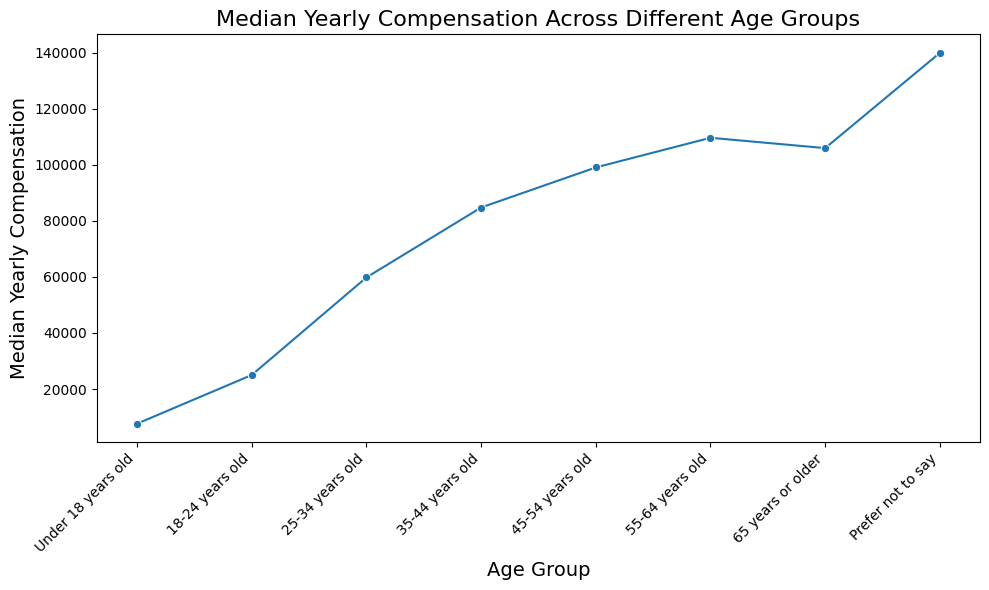

In [7]:
## Write your code here

# Assuming 'df' is your DataFrame and contains 'Age' and 'ConvertedCompYearly'

# Step 1: Clean the data (remove rows with missing values in the relevant columns)
df_cleaned = df.dropna(subset=['Age', 'ConvertedCompYearly'])

# Step 2: Group by Age and calculate the median of ConvertedCompYearly
age_median_compensation = df_cleaned.groupby('Age')['ConvertedCompYearly'].median().reset_index()

# Step 3: Sort by age if necessary (you can define custom age ordering if needed)
# Example: If you want a custom order like 'Under 18 years old', '18-24 years old', etc.
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', 
             '45-54 years old', '55-64 years old', '65 years or older', 'Prefer not to say']
age_median_compensation['Age'] = pd.Categorical(age_median_compensation['Age'], categories=age_order, ordered=True)
age_median_compensation = age_median_compensation.sort_values('Age')

# Step 4: Plot the line chart
plt.figure(figsize=(10, 6))  # Set the figure size

sns.lineplot(data=age_median_compensation, x='Age', y='ConvertedCompYearly', marker='o')

# Step 5: Customize the plot
plt.title('Median Yearly Compensation Across Different Age Groups', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Median Yearly Compensation', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


##### 2. Line Chart of Median `ConvertedCompYearly` for Ages 25 to 45


For a closer look, plot a line chart focusing on the median compensation for respondents between ages 25 and 45.


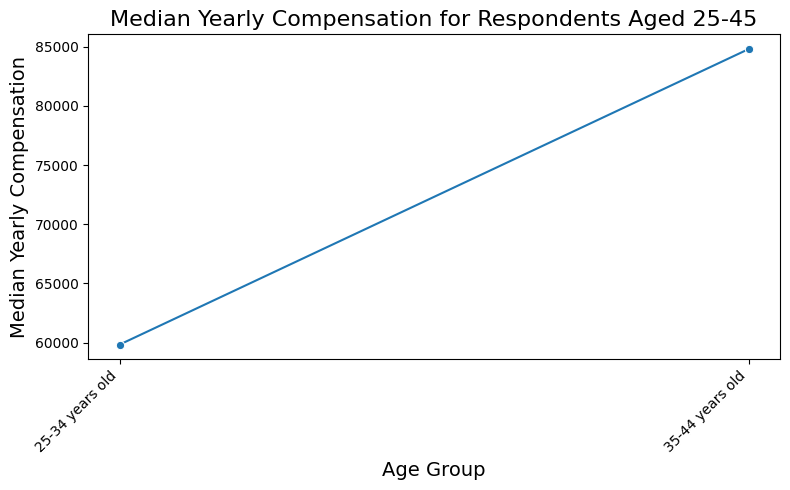

In [8]:
## Write your code here


# Step 2: Filter data for respondents between the ages of 25 and 45
age_groups = ['25-34 years old', '35-44 years old']
df_filtered = df_cleaned[df_cleaned['Age'].isin(age_groups)]

# Step 3: Group by Age and calculate the median of ConvertedCompYearly
age_median_compensation = df_filtered.groupby('Age')['ConvertedCompYearly'].median().reset_index()

# Step 4: Sort by Age to ensure proper order in the plot
age_median_compensation['Age'] = pd.Categorical(age_median_compensation['Age'], categories=age_groups, ordered=True)
age_median_compensation = age_median_compensation.sort_values('Age')

# Step 5: Plot the line chart
plt.figure(figsize=(8, 5))  # Set the figure size

sns.lineplot(data=age_median_compensation, x='Age', y='ConvertedCompYearly', marker='o')

# Step 6: Customize the plot
plt.title('Median Yearly Compensation for Respondents Aged 25-45', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Median Yearly Compensation', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


### Task 2: Trends in Job Satisfaction by Experience Level



##### 1. Line Chart of Job Satisfaction (`JobSatPoints_6`) by Experience Level



- Use a column that approximates experience level to analyze how job satisfaction changes with experience.

- If needed, substitute an available experience-related column for `Experience`.


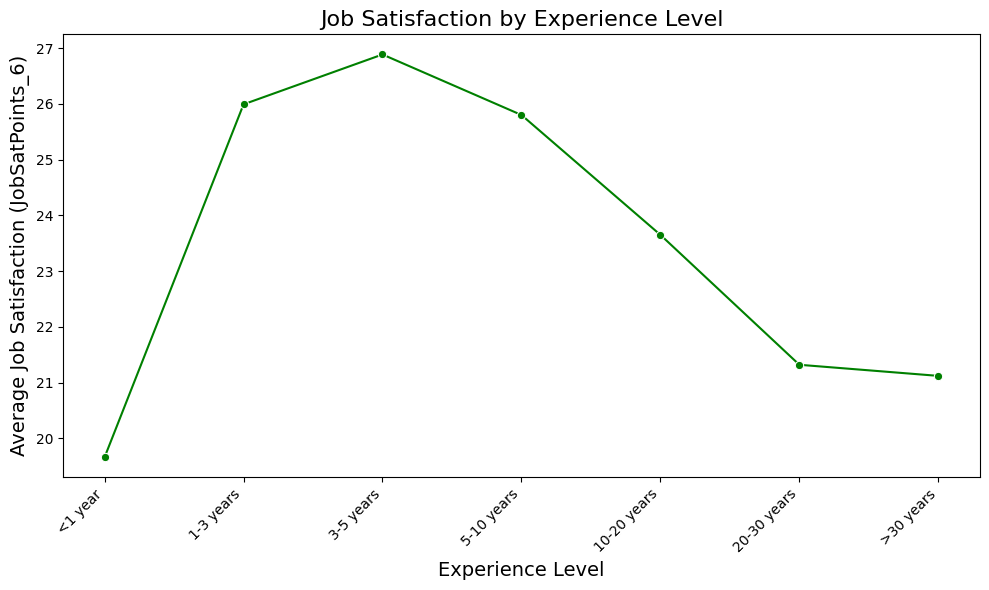

In [16]:


# Assuming 'df' contains 'WorkExp' and 'JobSatPoints_6'

# Step 1: Clean the data by dropping rows with missing 'WorkExp' or 'JobSatPoints_6'
df_cleaned = df.dropna(subset=['WorkExp', 'JobSatPoints_6']).copy()  # .copy() to avoid SettingWithCopyWarning

# Step 2: Categorize 'WorkExp' into experience levels (you can modify the bins if necessary)
bins = [0, 1, 3, 5, 10, 20, 30, float('inf')]  # Define experience level bins
labels = ['<1 year', '1-3 years', '3-5 years', '5-10 years', '10-20 years', '20-30 years', '>30 years']

# Create a new 'ExperienceLevel' column based on 'WorkExp'
df_cleaned['ExperienceLevel'] = pd.cut(df_cleaned['WorkExp'], bins=bins, labels=labels, right=False)

# Step 3: Group by 'ExperienceLevel' and calculate the average job satisfaction ('JobSatPoints_6')
experience_job_sat = df_cleaned.groupby('ExperienceLevel', observed=True)['JobSatPoints_6'].mean().reset_index()

# Step 4: Plot the results using a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=experience_job_sat, x='ExperienceLevel', y='JobSatPoints_6', marker='o', color='green')

# Step 5: Customize the plot
plt.title('Job Satisfaction by Experience Level', fontsize=16)
plt.xlabel('Experience Level', fontsize=14)
plt.ylabel('Average Job Satisfaction (JobSatPoints_6)', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


### Task 3: Trends in Job Satisfaction and Compensation by Experience


##### 1.Line Chart of Median ConvertedCompYearly Over Experience Level

- This line chart will track how median compensation (`ConvertedCompYearly`) changes with increasing experience.

- Use a column such as `WorkExp` or another relevant experience-related column.


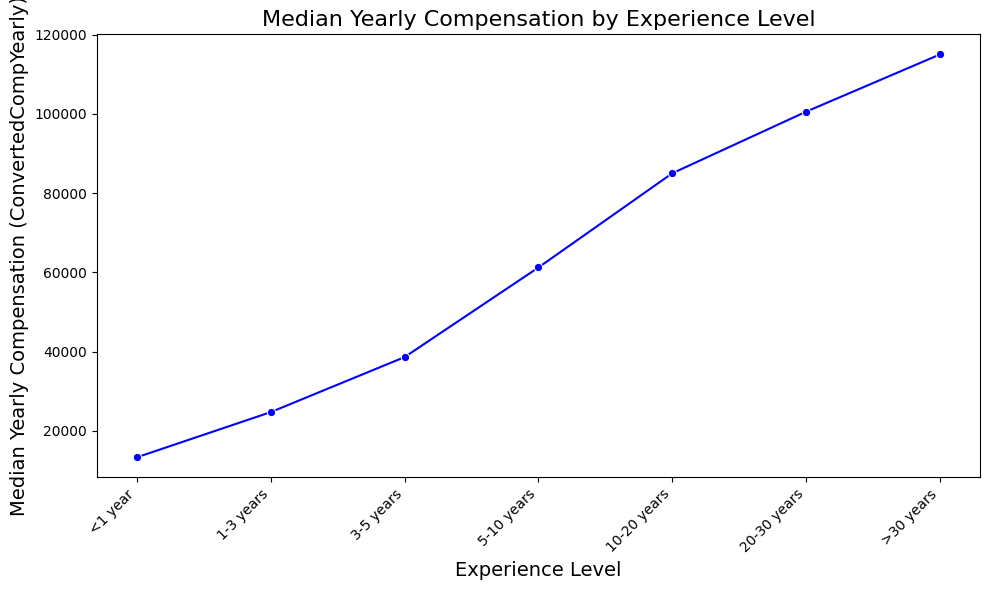

In [15]:
## Write your code here


# Assuming 'df' contains 'WorkExp' and 'ConvertedCompYearly'

# Step 1: Clean the data by dropping rows with missing 'WorkExp' or 'ConvertedCompYearly'
df_cleaned = df.dropna(subset=['WorkExp', 'ConvertedCompYearly']).copy()  # .copy() to avoid SettingWithCopyWarning

# Step 2: Categorize 'WorkExp' into experience levels (you can modify the bins if necessary)
bins = [0, 1, 3, 5, 10, 20, 30, float('inf')]  # Define experience level bins
labels = ['<1 year', '1-3 years', '3-5 years', '5-10 years', '10-20 years', '20-30 years', '>30 years']

# Create a new 'ExperienceLevel' column based on 'WorkExp'
df_cleaned['ExperienceLevel'] = pd.cut(df_cleaned['WorkExp'], bins=bins, labels=labels, right=False)

# Step 3: Group by 'ExperienceLevel' and calculate the median of 'ConvertedCompYearly'
experience_compensation = df_cleaned.groupby('ExperienceLevel', observed=True)['ConvertedCompYearly'].median().reset_index()

# Step 4: Plot the results using a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=experience_compensation, x='ExperienceLevel', y='ConvertedCompYearly', marker='o', color='blue')

# Step 5: Customize the plot
plt.title('Median Yearly Compensation by Experience Level', fontsize=16)
plt.xlabel('Experience Level', fontsize=14)
plt.ylabel('Median Yearly Compensation (ConvertedCompYearly)', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


##### 2.Line Chart of Job Satisfaction (`JobSatPoints_6`) Across Experience Levels

- Create a line chart to explore trends in job satisfaction (`JobSatPoints_6`) based on experience level.

- This chart will provide insight into how satisfaction correlates with experience over time


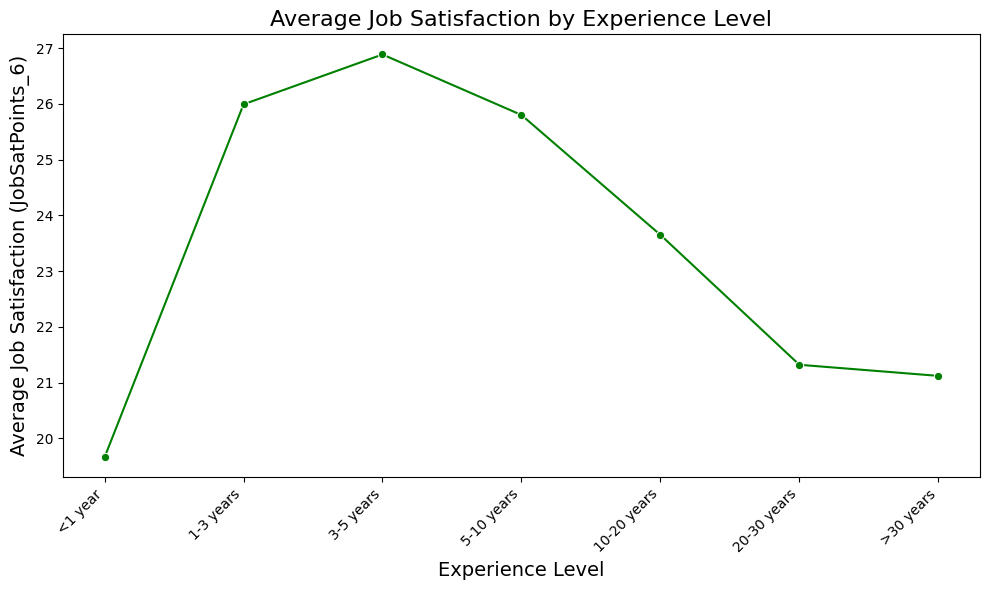

In [17]:
## Write your code here

# Step 1: Clean the data by removing rows with missing values in 'JobSatPoints_6' and 'WorkExp'
df_cleaned = df.dropna(subset=['JobSatPoints_6', 'WorkExp']).copy()

# Step 2: Categorize 'WorkExp' into experience levels (you can modify the bins if necessary)
bins = [0, 1, 3, 5, 10, 20, 30, float('inf')]  # Define experience level bins
labels = ['<1 year', '1-3 years', '3-5 years', '5-10 years', '10-20 years', '20-30 years', '>30 years']

# Create a new 'ExperienceLevel' column based on 'WorkExp'
df_cleaned['ExperienceLevel'] = pd.cut(df_cleaned['WorkExp'], bins=bins, labels=labels, right=False)

# Step 3: Group by 'ExperienceLevel' and calculate the mean of 'JobSatPoints_6'
experience_job_sat = df_cleaned.groupby('ExperienceLevel', observed=True)['JobSatPoints_6'].mean().reset_index()

# Step 4: Plot the results using a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=experience_job_sat, x='ExperienceLevel', y='JobSatPoints_6', marker='o', color='green')

# Step 5: Customize the plot
plt.title('Average Job Satisfaction by Experience Level', fontsize=16)
plt.xlabel('Experience Level', fontsize=14)
plt.ylabel('Average Job Satisfaction (JobSatPoints_6)', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


#### Final Step: Review


In this lab, you focused on analyzing trends in compensation and job satisfaction, specifically exploring how these metrics change with age and experience levels using line charts.


### Summary


In this lab, you explored essential data visualization techniques with a focus on analyzing trends using line charts. You learned to:

- Visualize the distribution of compensation across age groups to understand salary trends.

- Track changes in median compensation over various experience levels, identifying how earnings progress with experience.

- Examine trends in job satisfaction by experience, revealing how satisfaction varies throughout a developer's career.

These analyses allow for a deeper understanding of how factors like age and experience influence job satisfaction and compensation. By using line charts, you gained insights into continuous data patterns, which are invaluable for interpreting professional trends in the developer community.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
